<a href="https://colab.research.google.com/github/VarunSaiCSE/IIITH_AIML_Classes/blob/main/AIML_Module_04_Lab_02_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

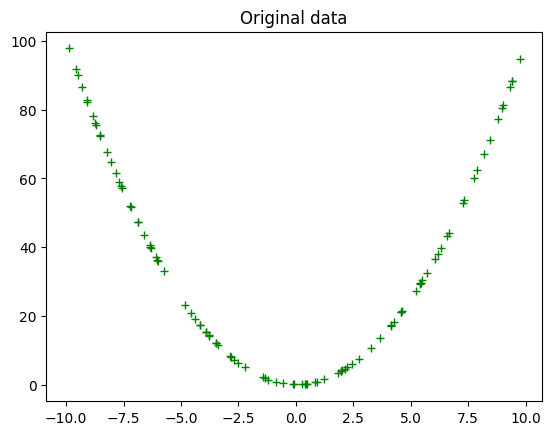

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


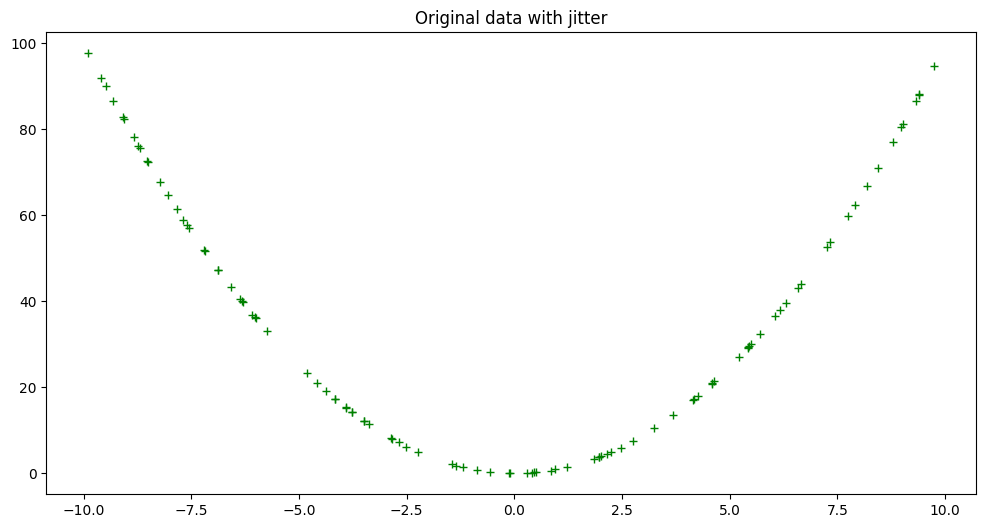

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

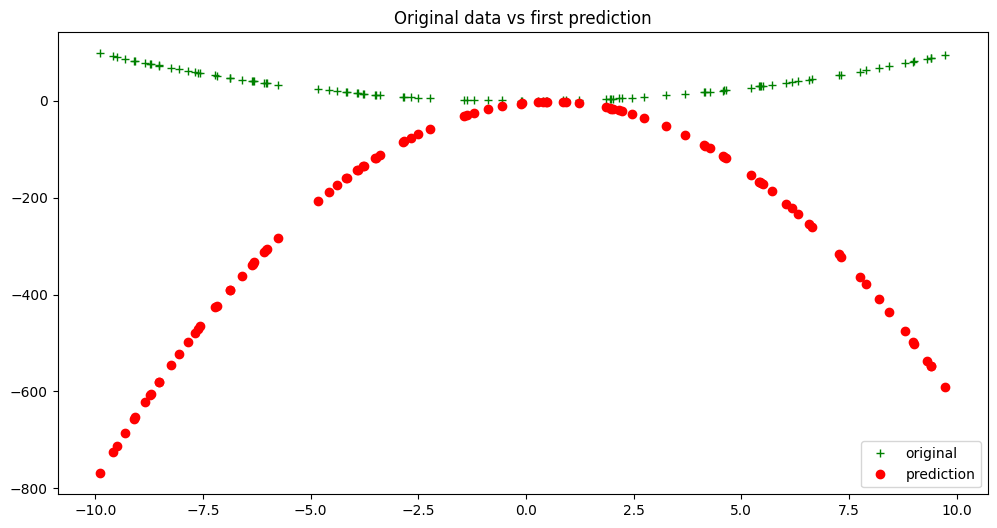

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

np.float64(146807.86204726336)

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (np.float64(-3.4872074852403587), np.float64(7.879149056895183), np.float64(-4.941405407033594))
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


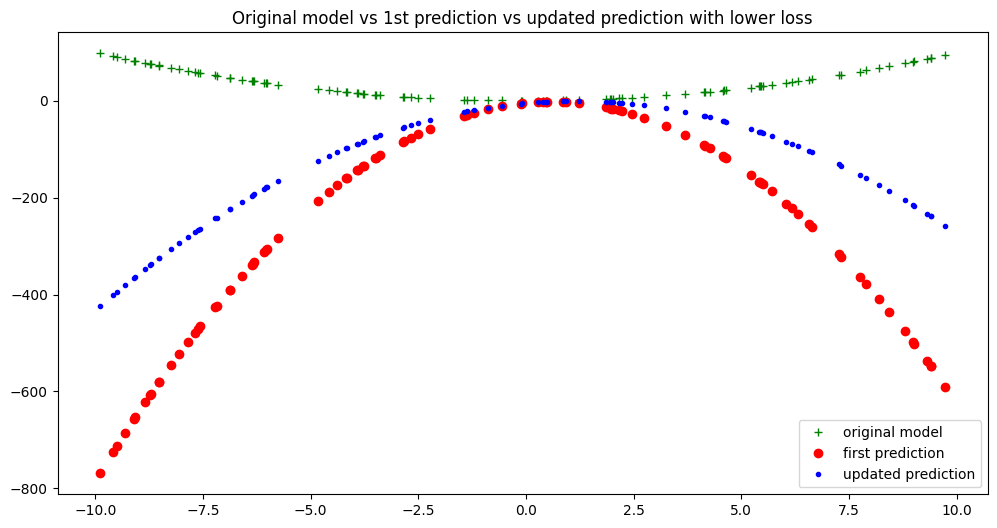

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [13]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [14]:
GD = gradient_descent(30000, 0.0003)


[np.float64(13475.624637116503), np.float64(2869.715432846906), np.float64(1958.273415665309), np.float64(1815.4133533665963), np.float64(1736.1622571518062), np.float64(1664.7307185029726), np.float64(1596.5981613153112), np.float64(1531.2972754982177), np.float64(1468.6853640008349), np.float64(1408.6497165327594), np.float64(1351.0841647769712), np.float64(1295.8870592843532), np.float64(1242.960945034913), np.float64(1192.2123779132319), np.float64(1143.5517588087196), np.float64(1096.8931753375862), np.float64(1052.154250140267), np.float64(1009.2559954258945), np.float64(968.1226735021916), np.float64(928.6816630441622), np.float64(890.8633308653946), np.float64(854.6009089655777), np.float64(819.8303766371265), np.float64(786.4903474227408), np.float64(754.5219607243141), np.float64(723.8687778717832), np.float64(694.476682468427), np.float64(666.2937848366366), np.float64(639.2703303954412), np.float64(613.3586118080115), np.float64(588.5128847440168), np.float64(564.6892871080

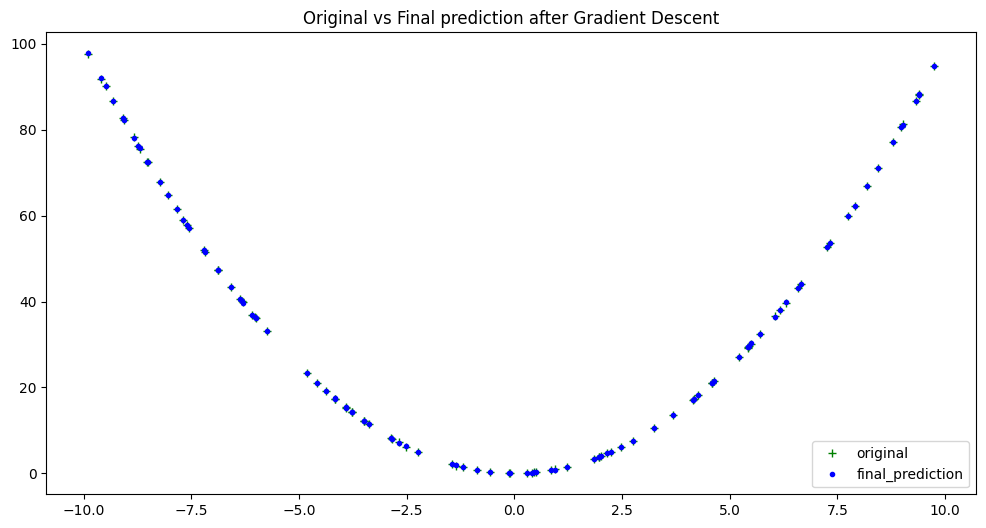

In [15]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [16]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (np.float64(0.9999579417260247), np.float64(-0.002867610798230069), np.float64(-0.012778521556486263))
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


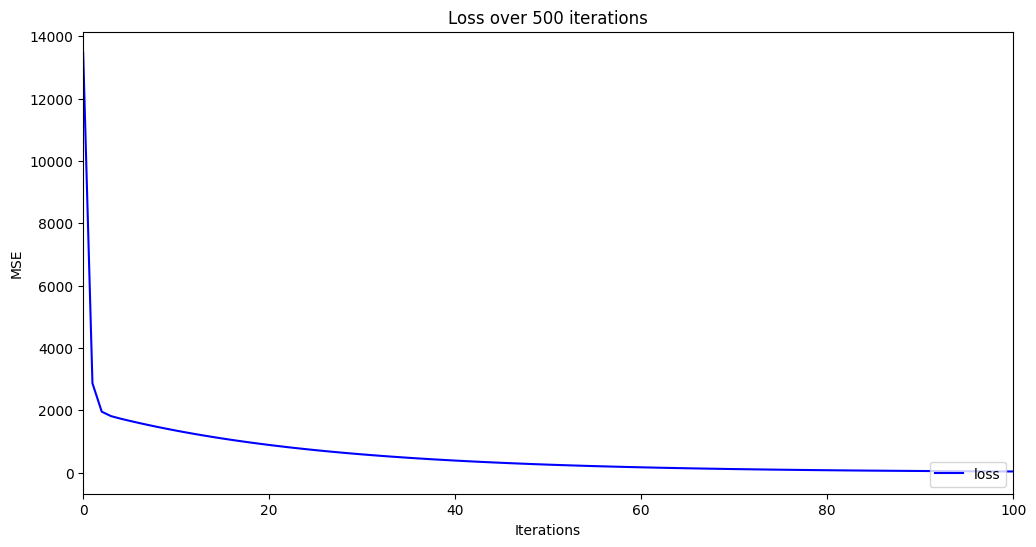

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



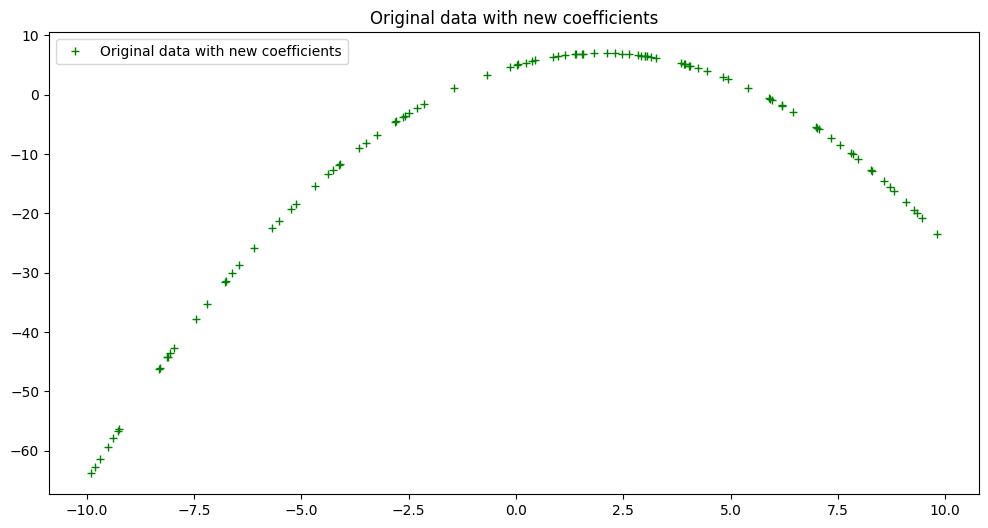

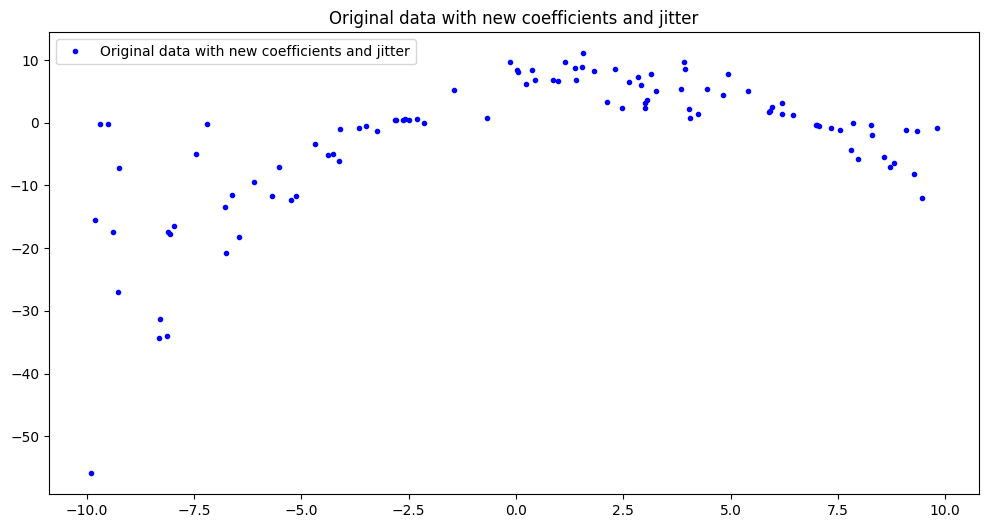

In [19]:
#Change the coefficients array and try a different polynomial instead of our $x^2$.

new_coeffs = [-0.5, 2, 5] # Example new coefficients for ax^2 + bx + c

new_xs = np.random.uniform(-10, 10, 100)
new_ys = []
new_ys_jittered = []

for x in new_xs:
    y = eval_2nd_degree(new_coeffs, x)
    new_ys.append(y)
    y_jittered = eval_2nd_degree_jitter(new_coeffs, x, 5)
    new_ys_jittered.append(y_jittered)

plt.figure(figsize=(12, 6))
plt.plot(new_xs, new_ys, 'g+', label='Original data with new coefficients')
plt.title('Original data with new coefficients')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(new_xs, new_ys_jittered, 'b.', label='Original data with new coefficients and jitter')
plt.title('Original data with new coefficients and jitter')
plt.legend()
plt.show()

[np.float64(134713.89057256628), np.float64(123630.45878546423), np.float64(113473.10878375187), np.float64(104164.44143316484), np.float64(95633.52641419876), np.float64(87815.36157565704), np.float64(80650.37747400091), np.float64(74083.98332199229), np.float64(68066.15088574983), np.float64(62551.03315859018), np.float64(57496.61490510184), np.float64(52864.39241182355), np.float64(48619.08000351412), np.float64(44728.34108801779), np.float64(41162.541679689486), np.float64(37894.52452268083), np.float64(34899.4020924058), np.float64(32154.366897396878), np.float64(29638.517635631204), np.float64(27332.699880251846), np.float64(25219.36008035556), np.float64(23282.411764009394), np.float64(21507.112923665605), np.float64(19879.95364937975), np.float64(18388.55315334771), np.float64(17021.56540085999), np.float64(15768.59262837147), np.float64(14620.106089502622), np.float64(13567.373424880521), np.float64(12602.39210221688), np.float64(11717.828419288318), np.float64(10906.961604886

/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-1511627215.py:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
/tmp/ipython-input-351704582.py:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
/tmp/ipython-input-351704582.py:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
/tmp/ipython-input-351704582.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[np.float64(1548813.4474793794), np.float64(16543429.687108263), np.float64(176885110.7957383), np.float64(1891440315.6665945), np.float64(20225389541.85867), np.float64(216272540786.81543), np.float64(2312628582416.4956), np.float64(24729218789103.82), np.float64(264432545176136.03), np.float64(2827609377647353.5), np.float64(3.0235971095194748e+16), np.float64(3.233169175688065e+17), np.float64(3.4572671357927276e+18), np.float64(3.696897811011931e+19), np.float64(3.953137807481302e+20), np.float64(4.227138353240141e+21), np.float64(4.52013047043726e+22), np.float64(4.833430506033562e+23), np.float64(5.168446045849621e+24), np.float64(5.526682238528724e+25), np.float64(5.9097485578274624e+26), np.float64(6.319366033615369e+27), np.float64(6.757374984070782e+28), np.float64(7.225743283811946e+29), np.float64(7.726575205110223e+30), np.float64(8.262120871906947e+31), np.float64(8.834786369108624e+32), np.float64(9.447144552579304e+33), np.float64(1.0101946608396985e+35), np.float64(1.0

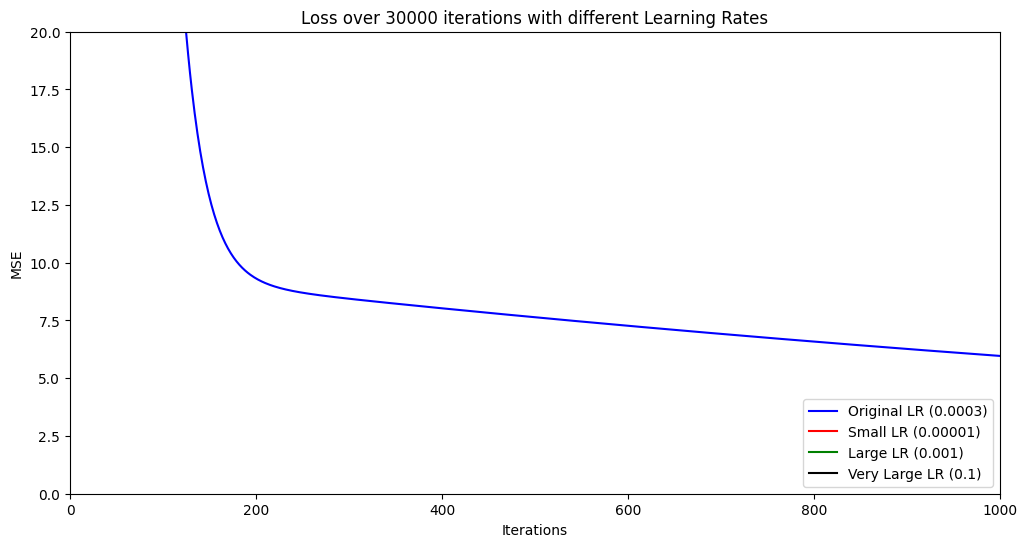

In [20]:
#Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

GD_small_lr = gradient_descent(30000, 0.00001)
GD_large_lr = gradient_descent(30000, 0.001)
GD_very_large_lr = gradient_descent(30000, 0.1)


plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'Original LR (0.0003)')
plt.plot(GD_small_lr[3], 'r-', label = 'Small LR (0.00001)')
plt.plot(GD_large_lr[3], 'g-', label = 'Large LR (0.001)')
plt.plot(GD_very_large_lr[3], 'k-', label = 'Very Large LR (0.1)')
plt.title('Loss over 30000 iterations with different Learning Rates')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.ylim([0, 20])
plt.xlim([0, 1000])
plt.show()

In [ ]:
#Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?

## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

# Task
Modify the code to perform gradient descent on a fifth-degree polynomial, analyze the impact of different initializations, and explain the findings.

## Define a new polynomial evaluation function

### Subtask:
Create a function `eval_5th_degree` to calculate the output of a fifth-degree polynomial given coefficients and an input x.


**Reasoning**:
The subtask requires defining a function to evaluate a fifth-degree polynomial. I will create this function in a code block.



In [21]:
def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients for the polynomial (a, b, c, d, e, f).
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth degree polynomial.

    """

    a = coeffs[0] * (x**5)
    b = coeffs[1] * (x**4)
    c = coeffs[2] * (x**3)
    d = coeffs[3] * (x**2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

## Define a new gradient calculation function

### Subtask:
Create a function `calc_gradient_5th_poly` to calculate the gradients for a fifth-degree polynomial.


**Reasoning**:
Define the `calc_gradient_5th_poly` function to calculate the gradients for a fifth-degree polynomial and update the coefficients.



In [22]:
def calc_gradient_5th_poly(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a fifth degree polynomial.

    Args:
        coeffs: Coefficients for a 5th degree polynomial [ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions)

    """
    a_s = []
    b_s = []
    c_s = []
    d_s = []
    e_s = []
    f_s = []

    y_bars = eval_5th_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        partial_a = (x**5) * (y - y_bar)
        a_s.append(partial_a)
        partial_b = (x**4) * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (x**3) * (y - y_bar)
        c_s.append(partial_c)
        partial_d = (x**2) * (y - y_bar)
        d_s.append(partial_d)
        partial_e = x * (y - y_bar)
        e_s.append(partial_e)
        partial_f = (y - y_bar)
        f_s.append(partial_f)

    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    gradient_d = (-2 / n) * sum(d_s)
    gradient_e = (-2 / n) * sum(e_s)
    gradient_f = (-2 / n) * sum(f_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    d_new = coeffs[3] - lr * gradient_d
    e_new = coeffs[4] - lr * gradient_e
    f_new = coeffs[5] - lr * gradient_f

    new_model_coeffs = (a_new, b_new, c_new, d_new, e_new, f_new)

    new_y_bar = eval_5th_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

## Generate new data

### Subtask:
Generate x and y data points based on a chosen set of coefficients for a degree 5 polynomial, adding jitter as before.


**Reasoning**:
Generate x and y data points for a fifth-degree polynomial with jitter, then plot the original and jittered data.



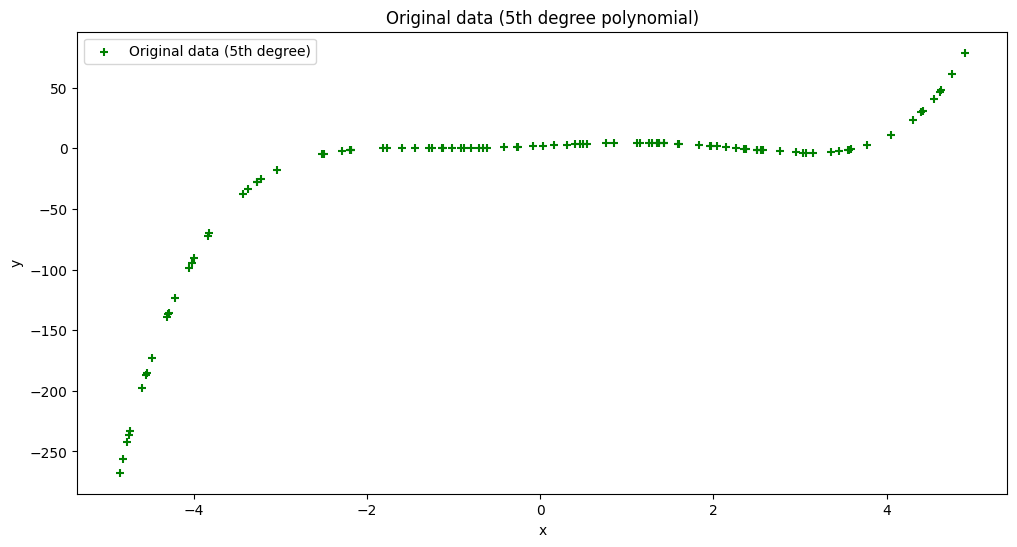

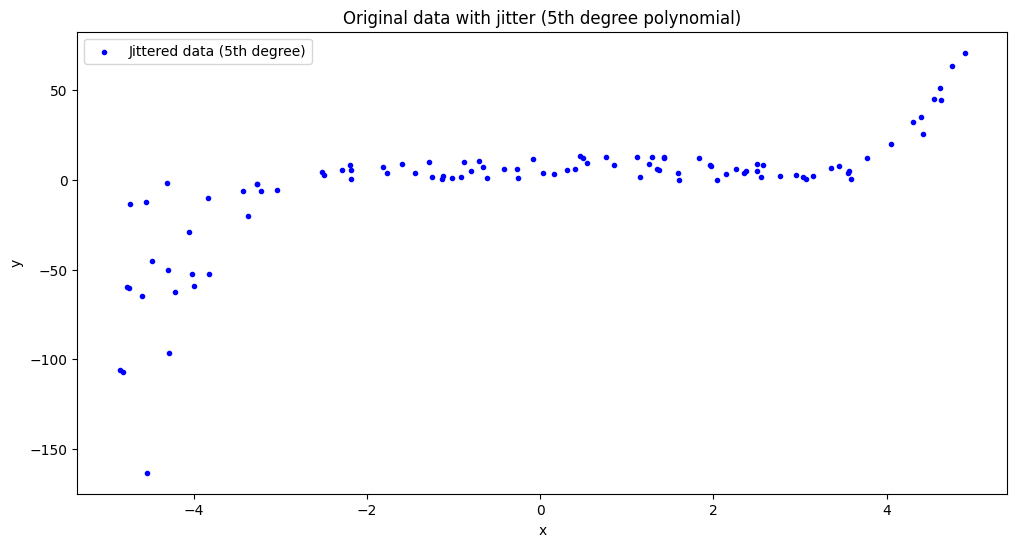

In [23]:
coeffs_5th = [0.1, -0.2, -1, 0.5, 3, 2] # Example coefficients for ax^5 + bx^4 + cx^3 + dx^2 + ex + f

hundred_xs_5th = np.random.uniform(-5, 5, 100) # Using a smaller range for x values for better visualization of a 5th degree poly
ys_5th = []
ys_jittered_5th = []

for x in hundred_xs_5th:
    y = eval_5th_degree(coeffs_5th, x)
    ys_5th.append(y)
    # Reuse eval_2nd_degree_jitter as it only needs the true y value, not the polynomial degree
    y_jittered = eval_2nd_degree_jitter([0, 0, y], 0, 10) # Pass y as the 'c' coefficient, and 0 for x and other coeffs
    ys_jittered_5th.append(y_jittered)

ys_5th = np.array(ys_5th)
ys_jittered_5th = np.array(ys_jittered_5th)

plt.figure(figsize=(12, 6))
plt.scatter(hundred_xs_5th, ys_5th, color='g', marker='+', label='Original data (5th degree)')
plt.title('Original data (5th degree polynomial)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(hundred_xs_5th, ys_jittered_5th, color='b', marker='.', label='Jittered data (5th degree)')
plt.title('Original data with jitter (5th degree polynomial)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Perform gradient descent with different initializations

### Subtask:
Run the gradient descent function multiple times with the new data and the modified gradient function, using different random initializations for the coefficients each time.


**Reasoning**:
Modify the existing gradient descent function to accept the gradient calculation function as an argument, and then run it three times with different random initializations for the fifth-degree polynomial data.



In [24]:
def gradient_descent_flexible(epochs, lr, coeffs, inputs_x, outputs_y, grad_calc_func):
    """
    Perform gradient descent for a polynomial of arbitrary degree.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate
        coeffs: initial coefficients for the polynomial
        inputs_x: x input datapoints
        outputs_y: actual y output points
        grad_calc_func: function to calculate gradients for the specific polynomial degree

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    current_coeffs = coeffs
    for i in range(epochs):
        loss, new_coeffs, new_y_bar = grad_calc_func(current_coeffs, inputs_x, outputs_y, lr)
        current_coeffs = new_coeffs
        losses.append(loss)
    print(f"Final loss after {epochs} epochs: {losses[-1]}")
    print(f"Final coefficients: {current_coeffs}")
    return loss, current_coeffs, new_y_bar, losses

# Run gradient descent with different random initializations for the 5th degree polynomial
epochs_5th = 50000
lr_5th = 0.0000001  # Adjusted learning rate for 5th degree

# Run 1 with random initialization
initial_coeffs_5th_1 = (random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5))
print(f"Run 1 - Initial coefficients: {initial_coeffs_5th_1}")
gd_result_5th_1 = gradient_descent_flexible(epochs_5th, lr_5th, initial_coeffs_5th_1, hundred_xs_5th, ys_jittered_5th, calc_gradient_5th_poly)

# Run 2 with a different random initialization
initial_coeffs_5th_2 = (random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5))
print(f"\nRun 2 - Initial coefficients: {initial_coeffs_5th_2}")
gd_result_5th_2 = gradient_descent_flexible(epochs_5th, lr_5th, initial_coeffs_5th_2, hundred_xs_5th, ys_jittered_5th, calc_gradient_5th_poly)

# Run 3 with another random initialization
initial_coeffs_5th_3 = (random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5), random.uniform(-5, 5))
print(f"\nRun 3 - Initial coefficients: {initial_coeffs_5th_3}")
gd_result_5th_3 = gradient_descent_flexible(epochs_5th, lr_5th, initial_coeffs_5th_3, hundred_xs_5th, ys_jittered_5th, calc_gradient_5th_poly)

Run 1 - Initial coefficients: (-1.821496802802213, -3.984432164620366, 1.793889412747144, 3.260501582834669, 1.681785058432375, -3.1672712121724276)
Final loss after 50000 epochs: 435.3922884862839
Final coefficients: (np.float64(-0.00393680794240737), np.float64(-0.1793624178445261), np.float64(0.5528352244969267), np.float64(3.2026508955317543), np.float64(1.4795295470661523), np.float64(-3.173489461806828))

Run 2 - Initial coefficients: (-0.4693680266391018, -4.962066523031298, -1.0801538193744422, -0.8169445616310567, 3.0923982253243647, 4.34947403900939)
Final loss after 50000 epochs: 284.33554076429175
Final coefficients: (np.float64(0.05534062907402175), np.float64(-0.006499001933441986), np.float64(-0.7324355157697156), np.float64(-0.5704825236803389), np.float64(3.1311046850679047), np.float64(4.3763644874889795))

Run 3 - Initial coefficients: (4.318823121397941, 2.831716716303628, 4.527035441446509, 3.5592572487907113, -2.2393805545892507, -4.23411600616629)
Final loss afte

## Analyze and visualize results

### Subtask:
Compare the final coefficients and the loss curves for each initialization to see if they converge to the same values. Explain why initialization might or might not matter for this polynomial compared to the second-degree polynomial.


**Reasoning**:
Plot the loss curves from the three gradient descent runs for the 5th-degree polynomial and print the final coefficients for comparison.



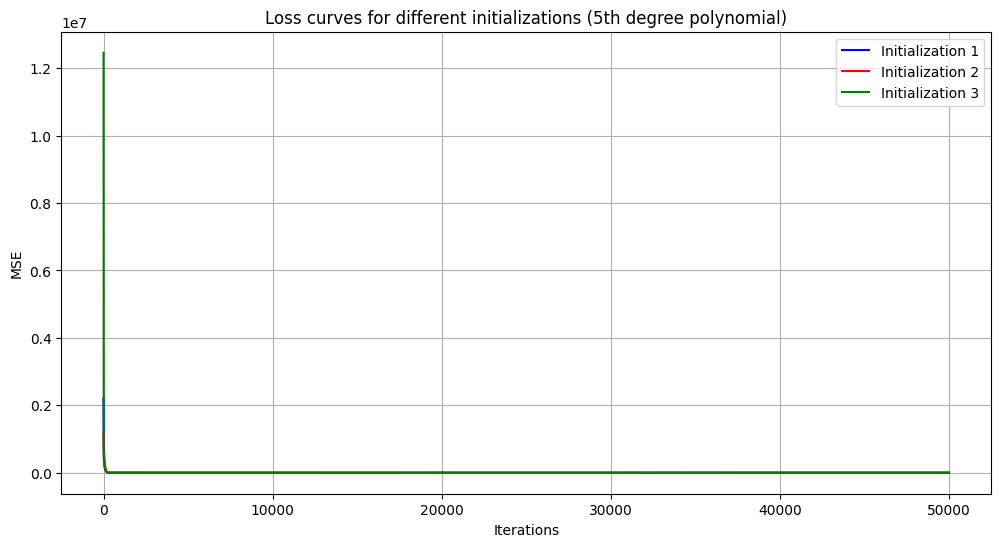

Final Coefficients from Initialization 1: (np.float64(-0.00393680794240737), np.float64(-0.1793624178445261), np.float64(0.5528352244969267), np.float64(3.2026508955317543), np.float64(1.4795295470661523), np.float64(-3.173489461806828))
Final Coefficients from Initialization 2: (np.float64(0.05534062907402175), np.float64(-0.006499001933441986), np.float64(-0.7324355157697156), np.float64(-0.5704825236803389), np.float64(3.1311046850679047), np.float64(4.3763644874889795))
Final Coefficients from Initialization 3: (np.float64(-0.058627981217668566), np.float64(-0.17520280199122357), np.float64(1.878488045707226), np.float64(3.163829366382286), np.float64(-2.6028608434018383), np.float64(-4.256414796350007))


In [25]:
plt.figure(figsize=(12, 6))
plt.plot(gd_result_5th_1[3], 'b-', label='Initialization 1')
plt.plot(gd_result_5th_2[3], 'r-', label='Initialization 2')
plt.plot(gd_result_5th_3[3], 'g-', label='Initialization 3')
plt.title('Loss curves for different initializations (5th degree polynomial)')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

print("Final Coefficients from Initialization 1:", gd_result_5th_1[1])
print("Final Coefficients from Initialization 2:", gd_result_5th_2[1])
print("Final Coefficients from Initialization 3:", gd_result_5th_3[1])

**Reasoning**:
Compare the final coefficients and loss curves and explain why initialization matters for a 5th-degree polynomial but not for a 2nd-degree polynomial.



In [26]:
# Original coefficients for the 5th degree polynomial
original_coeffs_5th = [0.1, -0.2, -1, 0.5, 3, 2]
print(f"Original Coefficients (5th degree): {original_coeffs_5th}")

# Comparison of final coefficients from different initializations
print("\nComparing Final Coefficients:")
print("Initialization 1:", gd_result_5th_1[1])
print("Initialization 2:", gd_result_5th_2[1])
print("Initialization 3:", gd_result_5th_3[1])


# Comparison of final loss values
print("\nComparing Final Loss Values:")
print("Initialization 1 Final Loss:", gd_result_5th_1[0])
print("Initialization 2 Final Loss:", gd_result_5th_2[0])
print("Initialization 3 Final Loss:", gd_result_5th_3[0])

Original Coefficients (5th degree): [0.1, -0.2, -1, 0.5, 3, 2]

Comparing Final Coefficients:
Initialization 1: (np.float64(-0.00393680794240737), np.float64(-0.1793624178445261), np.float64(0.5528352244969267), np.float64(3.2026508955317543), np.float64(1.4795295470661523), np.float64(-3.173489461806828))
Initialization 2: (np.float64(0.05534062907402175), np.float64(-0.006499001933441986), np.float64(-0.7324355157697156), np.float64(-0.5704825236803389), np.float64(3.1311046850679047), np.float64(4.3763644874889795))
Initialization 3: (np.float64(-0.058627981217668566), np.float64(-0.17520280199122357), np.float64(1.878488045707226), np.float64(3.163829366382286), np.float64(-2.6028608434018383), np.float64(-4.256414796350007))

Comparing Final Loss Values:
Initialization 1 Final Loss: 435.3922884862839
Initialization 2 Final Loss: 284.33554076429175
Initialization 3 Final Loss: 594.8358076670196


**Reasoning**:
Based on the comparison of final coefficients and loss values, write a markdown cell explaining whether the different initializations converged to the same values and why initialization matters for a 5th-degree polynomial.



**Reasoning**:
The previous command failed because a markdown cell was attempted within a code block. The markdown content needs to be in a separate markdown cell.




Based on the results, the three different initializations for the gradient descent on the 5th-degree polynomial converged to different final coefficients and different final loss values.

This is in contrast to the 2nd-degree polynomial case earlier, where different initializations likely converged to very similar coefficients and loss values.

The reason for this difference lies in the nature of the loss function for the two polynomials. A second-degree polynomial has a convex loss function, meaning it has only one global minimum. Regardless of where you start the gradient descent (the initial coefficients), the algorithm will always move towards and eventually converge at this single global minimum.

A fifth-degree polynomial, however, generally has a non-convex loss function. This means the loss function can have multiple local minima in addition to a global minimum. Gradient descent is a local optimization algorithm; it moves in the direction of the steepest decrease in the loss function from the current point. When the loss function has multiple local minima, the starting point (initialization) significantly influences which minimum the algorithm converges to. Depending on the initial coefficients, gradient descent might get ""stuck"" in a local minimum instead of reaching the global minimum, resulting in different final coefficients and loss values for different initializations.

**Reasoning**:
Based on the comparison of final coefficients and loss values, write a markdown cell explaining whether the different initializations converged to the same values and why initialization matters for a 5th-degree polynomial.

